Bayesian Decision theory  is a fundamental statistical approach to the problem of the  pattern classification. It is based on the tradeoff between the various classification decision using probability and the costs that accompany the decision. In the project, I am using Bayesian Decision Theory to classify the images of ten different classes.

In [ ]:
#Importing library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

MNIST database(Nodified National Institute of Stardards and Technology database) is a large dataset of handwritten digits whih is used for  training various image processing systems.Each images are 28 x 28 pixels in gray-scale. There are 10 classes from 0, 1, ... 9. The MNIST dataset contain 60000 training images and 10000 testing images. I am loading the dataset from keras .

In [ ]:
#Loading the dataset
df = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = df.load_data()

 I am normalising the dataset to change the values of numeric columns in the dataset to a common scale. Normalization does not distort the  differences in the ranges of values.

In [ ]:
 #Normalize the dataset
 x_train = x_train / 255.0 
 x_test  = x_test / 255.0

Creating the blank array of ten classes to put the data as per their category.

In [ ]:
#Create the blank array of ten classes
output_classes=10
data ={}
for i in range(0,output_classes):
    data[i] = []
data

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [ ]:
#Clubing the dataset as per their respective labels
for i in range(y_train.shape[0]):
    data[y_train[i]].append(x_train[i, :, :])


I am calculating the mean of the features for the ten categories.  

In [ ]:
#Finding the mean
mean_total={}
size_dem= x_train.shape[1:]
print(size_dem)
for i in data:
     sum = np.zeros(size_dem)
     for j in data[i]:
           sum =sum+ j
     sum= sum/len(data[i])
     mean_total[i] = sum
     


(28, 28)


Plot of the Mean digits

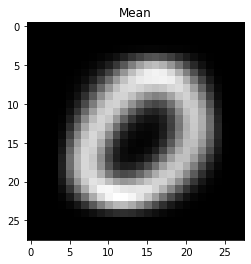

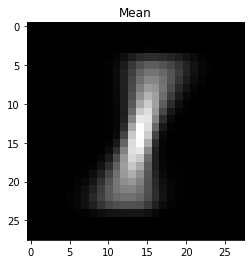

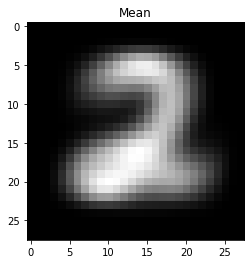

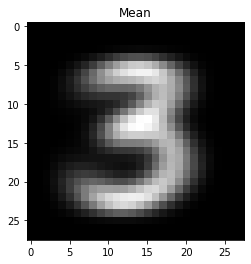

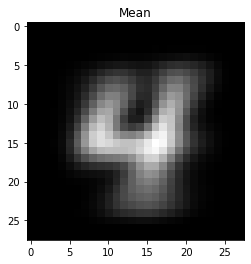

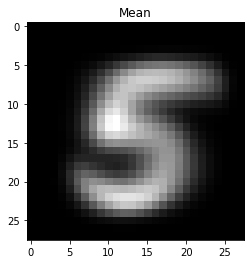

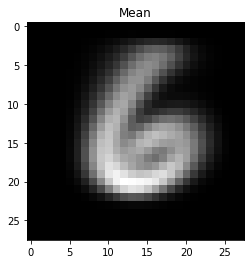

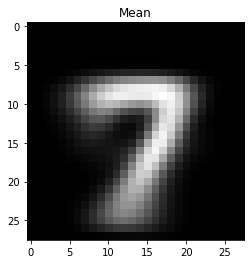

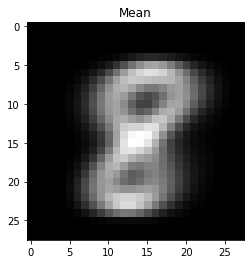

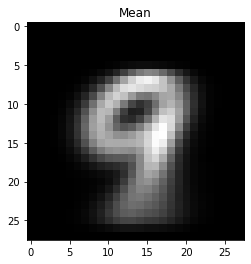

In [ ]:
#Display the mean of various classes
for i in range(len(data)):
   plt.clf()
   plt.imshow(mean_total[i],cmap='gray')
   plt.title("Mean")
   plt.show()

 I am calculating the Standard  Deviation for each categories.
 Formula of Standard Deviation is given by:-
 
 Standard Deviation:
$\sigma_{i}=\sqrt(\frac{\sum{(x_{i}-\mu)^{2}}}{N})$        

In [ ]:
#Finding the standard deviation
std_total={}
size_dem= x_train.shape[1:]
print(size_dem)
for i in data:
     std = np.zeros(size_dem)
     for j in data[i]:
        std=std + ((j - mean_total[i]) ** 2)            
     std = std/len(data[i])
     std_total[i] = std

(28, 28)


Plot of Standard Deviation digits for each categories.

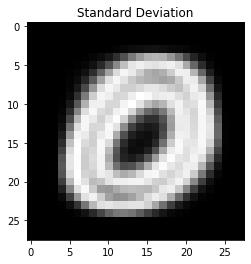

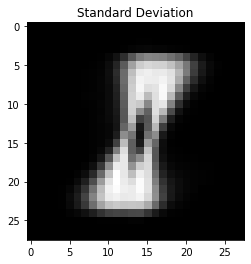

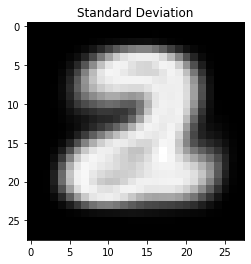

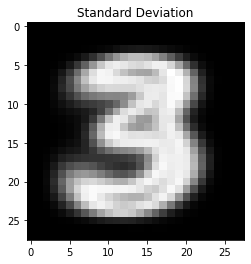

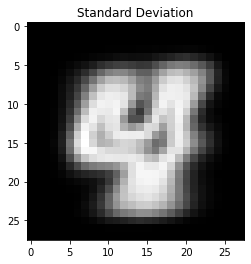

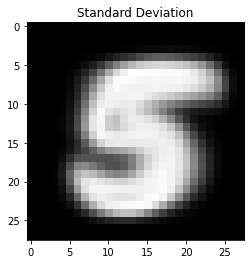

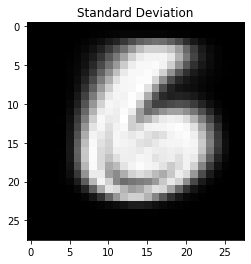

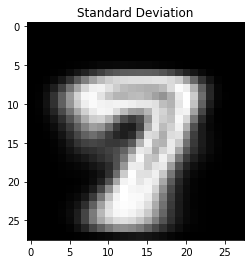

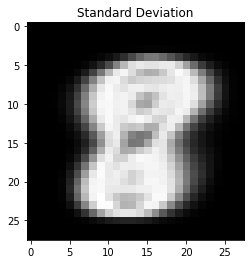

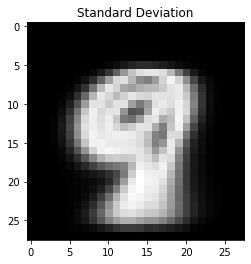

In [ ]:
#Display the standard Deviation of the various classes
for i in range(len(data)):
     plt.clf()
     plt.imshow(std_total[i],cmap='gray')
     plt.title("Standard Deviation")
     plt.show()

I am finding the covariance matrix for each categories.Covariance matrix is a square matrix which gives the covariance between each pair of elements of a given random vector. Formula of covariance matrix:-

In [ ]:
#Question No.2
#Finding the covariance matrix
for i in range(0,output_classes):
   std_total[i] = std_total[i].flatten()
   covaiance_mat= np.zeros((len(std_total[i]), len(std_total[i])))
   for j in range(len(std_total[i])):
      covaiance_mat[j][j] = (std_total[i][j] ** 2) +0.1
      
      

Loss function is a function that maps the cost associated with an action with respect to the true state of nature. In statistics and decision theory , we use 0-1 loss function which gives zero for taking a wrong action and one for taking a correct action with respect to their respective classes. I am using Quadratic discriminant function to calculate the posterior probability. The equation used for quadratic dicriminant analysis are as following:-
$g_{i}(x)=x^{T}W[i]x+N_{i}^{T}x+B_{i0}$

And,

$W_{i}=\frac{−1}{2}∑_{i}^{-1}$

$N_{i}=∑_{i}^{-1} μ_{i}$

$B_{i0}=\frac{-1}{2}μ_{i}^{t} \sum_{i}^{−1}μ_{i}+lnP(ω_{i})−\frac{1}{2}ln|\sum_{i}|$ 

I am calculating W,N and B by using the training dataset. Next, I am calculating the discriminant function by using W,B and N to get to train the model.





In [ ]:
#Find the W[i]
W={}
for i in range(0,output_classes):
   W[i]= -(np.linalg.inv(covaiance_mat))/2
   

In [ ]:
#Find the N[i]
N={}
for i in range(0,output_classes):
  mean_total[i]=mean_total[i].flatten()
  N[i]=np.matmul(np.linalg.inv(covaiance_mat), mean_total[i])

In [ ]:
PriorProb={}
for i in range(output_classes):
  PriorProb[i]=len(data[i])/x_train.shape[0]

In [ ]:
 #Find the B[i]
B={}
for i in range(output_classes):
  B[i]=-0.5*(np.matmul(np.transpose(mean_total[i]),N[i]))+ np.log(PriorProb[i])



Prediction is done on the test dataset. Test datasets are applied to the trained model for the prediction. As per the 0-1 Loss function, we try to minimize the risk associated with actions and it will be minimum when the discriminant function will be maximum. Hence, prediction is done by comparing the maximum of the discriminant function with the test labels.
The formula for accuracy is given by:

Accuracy= Correct value/length of the test data

In [ ]:
#Prediction on the test cases
gmax=[]
accuracy = 0
for y in(x_test):
  
  g=[]
  A={}
  F={}
  y=y.flatten()
  for i in range(output_classes):
    A[i]=np.matmul(np.matmul(np.transpose(y),W[i]),y)
    F[i]=np.matmul(np.transpose(N[i]),y)
    g.append(A[i]+F[i]+B[i])
  g=np.asarray(g)
  gmax.append(np.argmax(g))


#Finding the accuracy
accuracy=0
for i in range(len(gmax)): 
   if gmax[i] == y_test[i]:
      accuracy += 1
 

print("Accuracy: " + (str(accuracy/len(x_test))))
 

Accuracy: 0.8158


I am getting an accuracy of 81%. I am getting lesser accuracy as compared to the other methods because Quadratics discriminant analysis is based on the Gaussian assumption and the dataset will not perform well under these assumptions. Also,there is no scope for improvement of the accuracy as the weights are not updated.

Refereces:-
1)Slide of the professor
2)Wikipedia
3)https://www.researchgate.net/post/What_are_the_disadvantages_of_LDA_linear_discriminant_analysis